In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import spacy
from unicodedata import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Silvia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Silvia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
k_reviews=pd.read_csv('C:/Users/Silvia/Desktop/U/CUARTO/GYLUS/crack3.csv',encoding='latin-1')
k_reviews.head(5)

,Nombre,precio,Estrellas,comentario,Autor
0,Celular SAMSUNG Galaxy M31 128GB Negro + Cove...,$1.099.900,5.0,"El teléfono cumple con lo ofertado, es un exce...",Andrés Torres
1,Celular XIAOMI REDMI Note 8 -128GB Azul,$729.900,5.0,Excelente,Jhon C.
2,Celular SAMSUNG Galaxy M31 128GB Azul + Cover...,$1.099.900,5.0,"El teléfono cumple con lo ofertado, es un exce...",Andrés Torres
3,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Hasta el momento excelente,Jorge M.
4,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Excelente,oscar c.


In [102]:
k_reviews['comentario_nuevo']=k_reviews['comentario']

In [103]:
k_reviews.shape

(1063, 6)

In [104]:
k_reviews.isnull().sum()

Nombre              0
precio              0
Estrellas           0
comentario          0
Autor               0
comentario_nuevo    0
dtype: int64

In [105]:
k_reviews[k_reviews.duplicated()]

,Nombre,precio,Estrellas,comentario,Autor,comentario_nuevo
14,Celular MOTOROLA E6 Play 32GB Azul,$349.900,4.0,Buen producto,Luis G.,Buen producto
34,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Bueno,Sonia A.,Bueno
81,Celular MOTOROLA E6 Play 32GB Negro,$349.900,4.0,Buen producto,Luis G.,Buen producto
101,Celular MOTOROLA E6 Play 32GB Negro,$349.900,5.0,Bueno,Sonia A.,Bueno


In [106]:
print('Dimensions before dropping duplicated rows: ' + str(k_reviews.shape))
k_reviews = k_reviews.drop(k_reviews[k_reviews.duplicated()].index)
print('Dimensions after dropping duplicated rows: ' + str(k_reviews.shape))

Dimensions before dropping duplicated rows: (1063, 6)
Dimensions after dropping duplicated rows: (1059, 6)


In [107]:
 k_reviews.head(15)

,Nombre,precio,Estrellas,comentario,Autor,comentario_nuevo
0,Celular SAMSUNG Galaxy M31 128GB Negro + Cove...,$1.099.900,5.0,"El teléfono cumple con lo ofertado, es un exce...",Andrés Torres,"El teléfono cumple con lo ofertado, es un exce..."
1,Celular XIAOMI REDMI Note 8 -128GB Azul,$729.900,5.0,Excelente,Jhon C.,Excelente
2,Celular SAMSUNG Galaxy M31 128GB Azul + Cover...,$1.099.900,5.0,"El teléfono cumple con lo ofertado, es un exce...",Andrés Torres,"El teléfono cumple con lo ofertado, es un exce..."
3,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Hasta el momento excelente,Jorge M.,Hasta el momento excelente
4,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Excelente,oscar c.,Excelente
5,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Es de excelente funcionamiento.,DORIS E.,Es de excelente funcionamiento.
6,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,"Muy buen producto a excelente precio, tiene el...",John f.,"Muy buen producto a excelente precio, tiene el..."
7,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Justo lo que estaba buscando,STRATEGIC ..,Justo lo que estaba buscando
8,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Todo muy bien hasta ahora,Sorelys R.,Todo muy bien hasta ahora
9,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,llego en buen tiempo y hasta el momento funcio...,JavierMauricio E.,llego en buen tiempo y hasta el momento funcio...


In [108]:
 k_reviews =  k_reviews[ k_reviews['comentario'].notna()]
 k_reviews =  k_reviews[ k_reviews['Estrellas'].notna()]
 k_reviews

,Nombre,precio,Estrellas,comentario,Autor,comentario_nuevo
0,Celular SAMSUNG Galaxy M31 128GB Negro + Cove...,$1.099.900,5.0,"El teléfono cumple con lo ofertado, es un exce...",Andrés Torres,"El teléfono cumple con lo ofertado, es un exce..."
1,Celular XIAOMI REDMI Note 8 -128GB Azul,$729.900,5.0,Excelente,Jhon C.,Excelente
2,Celular SAMSUNG Galaxy M31 128GB Azul + Cover...,$1.099.900,5.0,"El teléfono cumple con lo ofertado, es un exce...",Andrés Torres,"El teléfono cumple con lo ofertado, es un exce..."
3,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Hasta el momento excelente,Jorge M.,Hasta el momento excelente
4,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5.0,Excelente,oscar c.,Excelente
...,...,...,...,...,...,...
1058,Celular SAMSUNG Galaxy A20S 32GB Negro,$753.900,5.0,Excelente,Claudia C.,Excelente
1059,Celular SAMSUNG Galaxy A20S 32GB Negro,$753.900,5.0,Buen ewuipo,Angela P.,Buen ewuipo
1060,Celular SAMSUNG Galaxy A20S 32GB Negro,$753.900,4.0,Bueno,Patricia P.,Bueno
1061,Celular SAMSUNG Galaxy A20S 32GB Negro,$753.900,5.0,hasta ahora funciona bien,Elizabeth M.,hasta ahora funciona bien


In [109]:
k_reviews['Nombre'].value_counts()

iPhone SE 32GB Gris                                     73
iPhone SE 32GB Plateado                                 73
iPhone 7 - 32GB Plateado                                45
iPhone 7 - 32GB Rosado                                  45
iPhone 7 - 32GB Negro                                   45
                                                        ..
Celular XIAOMI REDMI Note 8 -128GB Negro                 1
Celular XIAOMI REDMI Note 8 -128GB Blanco                1
Celular SAMSUNG Galaxy M31  128GB Rojo + Cover Negro     1
iPhone 11 Pro Max 256 GB Oro                             1
Celular HUAWEI P30 PRO 256GB Azul|Verde                  1
Name: Nombre, Length: 103, dtype: int64

In [110]:
cross_tab_stars = pd.crosstab(k_reviews['Nombre'], k_reviews['Estrellas']).sort_index()
columns_stars = list(cross_tab_stars.columns)
cross_tab_stars

Estrellas,1.0,2.0,3.0,4.0,5.0
Nombre,,,,,
Celular ALCATEL 3- 32GB 4G Azul,0,0,0,0,2
Celular ALCATEL 3- 32GB 4G Morado,0,0,0,0,2
Celular ALCATEL 3X - 2019 - 64 GB Negro,0,0,0,0,3
Celular ALCATEL 3X - 2019 - 64 GB Negro Verde,0,0,0,0,3
Celular ALCATEL 3X 32GB Dorado,0,0,0,0,1
...,...,...,...,...,...
iPhone XR 64GB Rojo,0,0,0,1,10
iPhone XS 64GB Plateado,0,0,0,0,1
iPhone XS Max 256GB Gris,0,0,0,0,2


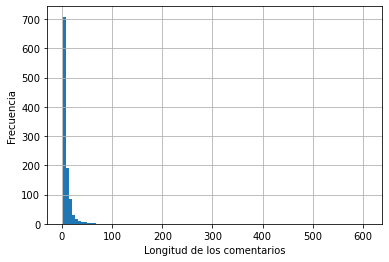

In [111]:
words_per_review = k_reviews.comentario.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Longitud de los comentarios')
plt.ylabel('Frecuencia')
plt.show()


In [112]:
print('Promedio de las Palabras:', words_per_review.mean())
print('Asimetria :', words_per_review.skew())

Promedio de las Palabras: 7.7743153918791315
Asimetria : 24.25462918877969


In [113]:
percent_val = 100 * k_reviews['Estrellas'].value_counts()/len(k_reviews)
percent_val

5.0    79.792257
4.0    14.164306
3.0     3.021719
1.0     2.077432
2.0     0.944287
Name: Estrellas, dtype: float64

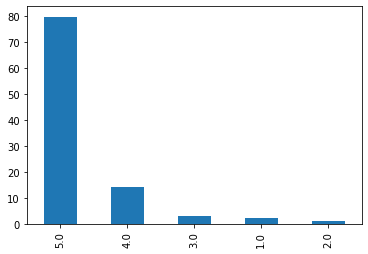

In [114]:
percent_val.plot.bar()
plt.show()

In [115]:
k_reviews["Estrellas"] = k_reviews["Estrellas"].astype(float).astype(int)

In [116]:
k_reviews['Sentimiento'] = np.where(k_reviews.Estrellas > 3,1,0)
## Removing neutral reviews 
k_reviews = k_reviews[k_reviews.Estrellas != 3]

# Printing the counts of each class
k_reviews['Sentimiento'].value_counts()

1    995
0     32
Name: Sentimiento, dtype: int64

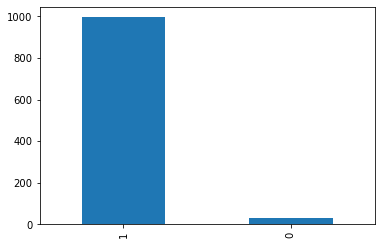

In [117]:
k_reviews.Sentimiento.value_counts().plot.bar()
plt.show()

In [118]:
#empieza tokenizacion 

allReviews = k_reviews['comentario']
allReviews.head(15)

0     El teléfono cumple con lo ofertado, es un exce...
1                                             Excelente
2     El teléfono cumple con lo ofertado, es un exce...
3                            Hasta el momento excelente
4                                             Excelente
5                       Es de excelente funcionamiento.
6     Muy buen producto a excelente precio, tiene el...
7                          Justo lo que estaba buscando
8                             Todo muy bien hasta ahora
9     llego en buen tiempo y hasta el momento funcio...
10                        superó todas las expectativas
11    Es un producto muy bueno, y estoy satisfecha c...
12                                            Excelente
13                                        Buen producto
15                                            Excelente
Name: comentario, dtype: object

In [119]:
k_reviews['reviews_coment'] = k_reviews['comentario'].str.lower()

<ipython-input-119-ea3b90b5284e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_reviews['reviews_coment'] = k_reviews['comentario'].str.lower()


In [120]:
token_lists = [word_tokenize(each) for each in k_reviews['comentario']]
tokens = [item for sublist in token_lists for item in sublist]
print("NUMERO DE TOKENS: ",len(set(tokens)))

# Comentarios convertidos en lower case
token_lists_lower = [word_tokenize(each) for each in k_reviews['reviews_coment']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("NUMERO DE TOKENS AHORA: ",len(set(tokens_lower)))

NUMERO DE TOKENS:  1028
NUMERO DE TOKENS AHORA:  894


In [121]:
# Tokenización de palabras
for sentence in tokens_lower:
    words = nltk.word_tokenize(sentence)
    print(sentence)
    print(words)
    print()

el
['el']

teléfono
['teléfono']

cumple
['cumple']

con
['con']

lo
['lo']

ofertado
['ofertado']

,
[',']

es
['es']

un
['un']

excelente
['excelente']

equipo
['equipo']

.
['.']

excelente
['excelente']

el
['el']

teléfono
['teléfono']

cumple
['cumple']

con
['con']

lo
['lo']

ofertado
['ofertado']

,
[',']

es
['es']

un
['un']

excelente
['excelente']

equipo
['equipo']

.
['.']

hasta
['hasta']

el
['el']

momento
['momento']

excelente
['excelente']

excelente
['excelente']

es
['es']

de
['de']

excelente
['excelente']

funcionamiento
['funcionamiento']

.
['.']

muy
['muy']

buen
['buen']

producto
['producto']

a
['a']

excelente
['excelente']

precio
['precio']

,
[',']

tiene
['tiene']

el
['el']

rendimiento
['rendimiento']

adecuado
['adecuado']

para
['para']

un
['un']

celular
['celular']

de
['de']

esta
['esta']

gama
['gama']

.
['.']

justo
['justo']

lo
['lo']

que
['que']

estaba
['estaba']

buscando
['buscando']

todo
['todo']

muy
['muy']

bien
['bien']

h

a
['a']

pesar
['pesar']

de
['de']

los
['los']

números
['números']

que
['que']

maneja
['maneja']

.
['.']

lo
['lo']

único
['único']

realmente
['realmente']

malo
['malo']

,
[',']

sería
['sería']

el
['el']

peso
['peso']

del
['del']

equipo
['equipo']

,
[',']

es
['es']

muy
['muy']

pesado
['pesado']

.
['.']

por
['por']

ahora
['ahora']

el
['el']

producto
['producto']

ha
['ha']

funcionado
['funcionado']

bien
['bien']

,
[',']

no
['no']

ha
['ha']

presentado
['presentado']

problemas
['problemas']

.
['.']

buena
['buena']

calidad
['calidad']

,
[',']

diseño
['diseño']

excelente
['excelente']

y
['y']

trabaja
['trabaja']

muy
['muy']

bien
['bien']

hasta
['hasta']

el
['el']

momento
['momento']

excelente
['excelente']

excelente
['excelente']

es
['es']

de
['de']

excelente
['excelente']

funcionamiento
['funcionamiento']

.
['.']

muy
['muy']

buen
['buen']

producto
['producto']

a
['a']

excelente
['excelente']

precio
['precio']

,
[',']

tiene
['tiene'

muy
['muy']

cómoda
['cómoda']

.
['.']

en
['en']

general
['general']

es
['es']

muy
['muy']

rápido
['rápido']

.
['.']

las
['las']

fotos
['fotos']

no
['no']

son
['son']

las
['las']

mejores
['mejores']

a
['a']

pesar
['pesar']

de
['de']

los
['los']

números
['números']

que
['que']

maneja
['maneja']

.
['.']

lo
['lo']

único
['único']

realmente
['realmente']

malo
['malo']

,
[',']

sería
['sería']

el
['el']

peso
['peso']

del
['del']

equipo
['equipo']

,
[',']

es
['es']

muy
['muy']

pesado
['pesado']

.
['.']

por
['por']

ahora
['ahora']

el
['el']

producto
['producto']

ha
['ha']

funcionado
['funcionado']

bien
['bien']

,
[',']

no
['no']

ha
['ha']

presentado
['presentado']

problemas
['problemas']

.
['.']

buena
['buena']

calidad
['calidad']

,
[',']

diseño
['diseño']

excelente
['excelente']

y
['y']

trabaja
['trabaja']

muy
['muy']

bien
['bien']

muy
['muy']

bueno
['bueno']

,
[',']

podría
['podría']

mejorar
['mejorar']

la
['la']

forma
['forma'

trasera
['trasera']

y
['y']

una
['una']

frontal
['frontal']

,
[',']

facil
['facil']

configuracion
['configuracion']

.
['.']

es
['es']

un
['un']

teléfono
['teléfono']

robusto
['robusto']

,
[',']

rápido
['rápido']

de
['de']

buena
['buena']

calidad
['calidad']

,
[',']

bonito
['bonito']

excelente
['excelente']

muy
['muy']

bien
['bien']

presenta
['presenta']

fallas
['fallas']

cuando
['cuando']

se
['se']

esta
['esta']

hablando
['hablando']

por
['por']

teléfono
['teléfono']

buen
['buen']

producto
['producto']

diseño
['diseño']

ultradelgado
['ultradelgado']

sin
['sin']

borde
['borde']

y
['y']

la
['la']

cámara
['cámara']

de
['de']

48mp
['48mp']

excelente
['excelente']

,
[',']

duración
['duración']

de
['de']

batería
['batería']

superior
['superior']

a
['a']

muchos
['muchos']

otros
['otros']

teléfonos
['teléfonos']

espectacular
['espectacular']

excelente
['excelente']

producto
['producto']

,
[',']

la
['la']

entrega
['entrega']

fue
['fue']



satisfacer
['satisfacer']

necesidades
['necesidades']

de
['de']

comunicación
['comunicación']

en
['en']

pleno
['pleno']

2020
['2020']

sin
['sin']

necesidad
['necesidad']

de
['de']

estar
['estar']

adicto
['adicto']

a
['a']

redes
['redes']

sociales
['sociales']

muy
['muy']

útil
['útil']

y
['y']

de
['de']

buena
['buena']

calidad
['calidad']

perfecto
['perfecto']

para
['para']

quienes
['quienes']

solo
['solo']

necesitan
['necesitan']

llamar
['llamar']

(
['(']

sobre
['sobre']

todo
['todo']

en
['en']

la
['la']

calle
['calle']

)
[')']

con
['con']

las
['las']

bondades
['bondades']

del
['del']

#
['#']

tbt
['tbt']

1100
['1100']

basico
['basico']

para
['para']

lo
['lo']

que
['que']

requiero
['requiero']

buen
['buen']

producto
['producto']

,
[',']

precio
['precio']

justo
['justo']

!
['!']

buena
['buena']

funcional
['funcional']

práctico
['práctico']

y
['y']

sin
['sin']

depender
['depender']

de
['de']

cargadores
['cargadores']

para
['para'

es
['es']

bueno
['bueno']

pero
['pero']

la
['la']

batería
['batería']

se
['se']

descarga
['descarga']

un
['un']

poco
['poco']

rápido
['rápido']

sin
['sin']

duda
['duda']

alguna
['alguna']

,
[',']

una
['una']

excelente
['excelente']

inversión
['inversión']

para
['para']

celulares
['celulares']

gama
['gama']

media
['media']

que
['que']

funciona
['funciona']

como
['como']

gama
['gama']

alta
['alta']

.
['.']

además
['además']

trae
['trae']

estuche
['estuche']

y
['y']

repuesto
['repuesto']

de
['de']

vidrio
['vidrio']

templado
['templado']

.
['.']

una
['una']

muy
['muy']

buena
['buena']

opción
['opción']

para
['para']

quienes
['quienes']

no
['no']

necesitan
['necesitan']

lo
['lo']

más
['más']

avanzado
['avanzado']

,
[',']

pero
['pero']

sí
['sí']

buena
['buena']

calidad
['calidad']

y
['y']

100
['100']

%
['%']

colombiano
['colombiano']

.
['.']

es
['es']

muy
['muy']

bueno
['bueno']

sobre
['sobre']

la
['la']

calidad
['calidad']

los
[


.
['.']

perfecto
['perfecto']

es
['es']

un
['un']

buen
['buen']

celular
['celular']

aunque
['aunque']

le
['le']

hace
['hace']

falta
['falta']

algunas
['algunas']

cosas
['cosas']

me
['me']

gusto
['gusto']

bastante
['bastante']

,
[',']

es
['es']

muy
['muy']

completo
['completo']

y
['y']

las
['las']

fotos
['fotos']

son
['son']

muy
['muy']

nítidas
['nítidas']

bueno
['bueno']

muy
['muy']

bueno
['bueno']

pero
['pero']

la
['la']

cámara
['cámara']

tiene
['tiene']

deficiencias
['deficiencias']

de
['de']

nitidez
['nitidez']

,
[',']

enfoque
['enfoque']

y
['y']

pixelado
['pixelado']

muy
['muy']

bien
['bien']

todo
['todo']

cumplio
['cumplio']

con
['con']

las
['las']

expectativas
['expectativas']

el
['el']

diseño
['diseño']

es
['es']

muy
['muy']

lindo
['lindo']

,
[',']

es
['es']

fácil
['fácil']

de
['de']

usar
['usar']

,
[',']

muy
['muy']

rara
['rara']

vez
['vez']

se
['se']

tiende
['tiende']

a
['a']

quedar
['quedar']

trabado
['trabado']

buen
['buen']

rendimiento
['rendimiento']

y
['y']

excelente
['excelente']

producto
['producto']

.
['.']

funciona
['funciona']

muy
['muy']

bien
['bien']

,
[',']

la
['la']

batería
['batería']

cumple
['cumple']

y
['y']

dura
['dura']

bastante
['bastante']

y
['y']

las
['las']

fotografías
['fotografías']

salen
['salen']

muy
['muy']

bien
['bien']

excdelente
['excdelente']

muy
['muy']

bueno
['bueno']

excelente
['excelente']

relación
['relación']

costo
['costo']

beneficio
['beneficio']

de
['de']

lo
['lo']

mejor
['mejor']

muy
['muy']

bueno
['bueno']

y
['y']

moderno
['moderno']

muy
['muy']

bueno
['bueno']

bueno
['bueno']

buena
['buena']

funcionalidad
['funcionalidad']

,
[',']

es
['es']

un
['un']

buen
['buen']

equipo
['equipo']

,
[',']

rápido
['rápido']

,
[',']

un
['un']

poco
['poco']

grande
['grande']

para
['para']

mi
['mi']

gusto
['gusto']

pero
['pero']

muy
['muy']

moderno
['moderno']

muy
['muy']

funcional
['funcional']

,
[',']

y
['y']

son
['son']

lo
['lo']

mejor
['mejor']

excelente
['excelente']

compra
['compra']

es
['es']

casi
['casi']

un
['un']

smartphone
['smartphone']

de
['de']

gama
['gama']

alta
['alta']

al
['al']

precio
['precio']

de
['de']

un
['un']

gama
['gama']

media
['media']

,
[',']

rendimiento
['rendimiento']

y
['y']

almacenamiento
['almacenamiento']

excelente
['excelente']

.
['.']

muy
['muy']

bueno
['bueno']

.
['.']

excelente
['excelente']

excelente
['excelente']

excelente
['excelente']

producto
['producto']

muy
['muy']

bonito
['bonito']

y
['y']

funcional
['funcional']

buen
['buen']

diseño
['diseño']

,
[',']

calidad
['calidad']

excelente
['excelente']

en
['en']

las
['las']

fotografías
['fotografías']

,
[',']

muy
['muy']

buena
['buena']

duración
['duración']

de
['de']

batería
['batería']

muy
['muy']

bonito
['bonito']

y
['y']

funcional
['funcional']

ok
['ok']

muy
['muy']

bueno
['bueno']

excelente
['excelente']

calidad
['calidad']

,
[',']

diseño
['

['y']

un
['un']

diseño
['diseño']

y
['y']

terminado
['terminado']

impecable
['impecable']

excelente
['excelente']

celular
['celular']

el
['el']

mejor
['mejor']

de
['de']

todos
['todos']

y
['y']

con
['con']

la
['la']

mejor
['mejor']

garantía
['garantía']

lo
['lo']

recibe
['recibe']

en
['en']

excelente
['excelente']

estado
['estado']

,
[',']

calidad
['calidad']

y
['y']

diseño
['diseño']

extraordinarios
['extraordinarios']

,
[',']

digno
['digno']

de
['de']

un
['un']

producto
['producto']

apple
['apple']

.
['.']

excelente
['excelente']

excelente
['excelente']

muy
['muy']

buena
['buena']

marca
['marca']

perfecto
['perfecto']

buen
['buen']

producto
['producto']

y
['y']

muy
['muy']

buen
['buen']

servicio
['servicio']

de
['de']

entrega
['entrega']

y
['y']

compra
['compra']

en
['en']

la
['la']

página
['página']

web
['web']

.
['.']

buen
['buen']

servicio
['servicio']

en
['en']

el
['el']

proceso
['proceso']

de
['de']

venta
['venta']

y


ahora
['ahora']

,
[',']

todo
['todo']

bien
['bien']

,
[',']

la
['la']

cámara
['cámara']

lo
['lo']

normal
['normal']

,
[',']

lo
['lo']

único
['único']

regular
['regular']

es
['es']

la
['la']

resolución
['resolución']

de
['de']

pantalla
['pantalla']

,
[',']

pero
['pero']

se
['se']

n
['n']

general
['general']

está
['está']

muy
['muy']

bien
['bien']

para
['para']

el
['el']

precio
['precio']

.
['.']

satisfecho
['satisfecho']

!
['!']

muy
['muy']

practico
['practico']

la
['la']

verdad
['verdad']

es
['es']

muy
['muy']

bonito
['bonito']

pero
['pero']

ya
['ya']

tuvimos
['tuvimos']

que
['que']

llevarlo
['llevarlo']

a
['a']

garantía
['garantía']

porque
['porque']

no
['no']

funciona
['funciona']

el
['el']

altavoz
['altavoz']

del
['del']

celular
['celular']

no
['no']

vibra
['vibra']

y
['y']

no
['no']

suena
['suena']

por
['por']

favor
['favor']

indicar
['indicar']

a
['a']

donde
['donde']

se
['se']

pueden
['pueden']

llevar
['llevar']

pa


funcionalidad
['funcionalidad']

.
['.']

excelente
['excelente']

bueno
['bueno']

bonito
['bonito']

y
['y']

agradable
['agradable']

todo
['todo']

perfecto
['perfecto']

!
['!']

!
['!']

me
['me']

entregaron
['entregaron']

mi
['mi']

iphone
['iphone']

7
['7']

en
['en']

un
['un']

1
['1']

día
['día']

,
[',']

pese
['pese']

a
['a']

que
['que']

la
['la']

promesa
['promesa']

de
['de']

servicio
['servicio']

es
['es']

en
['en']

3
['3']

días
['días']

.
['.']

producto
['producto']

intacto
['intacto']

,
[',']

los
['los']

recomiendo
['recomiendo']

.
['.']

es
['es']

un
['un']

buen
['buen']

producto
['producto']

muy
['muy']

buen
['buen']

desempeño
['desempeño']

muy
['muy']

buen
['buen']

desempeño
['desempeño']

me
['me']

gusta
['gusta']

su
['su']

diseño
['diseño']

y
['y']

sus
['sus']

funcionalidades
['funcionalidades']

.
['.']

muy
['muy']

bueno
['bueno']

hasta
['hasta']

el
['el']

momento
['momento']

los
['los']

equipos
['equipos']

van
['van']

producto
['producto']

tiene
['tiene']

la
['la']

elegancia
['elegancia']

que
['que']

caracteriza
['caracteriza']

a
['a']

apple
['apple']

,
[',']

es
['es']

impecable
['impecable']

el
['el']

diseño
['diseño']

,
[',']

es
['es']

compacto
['compacto']

y
['y']

poderoso
['poderoso']

genial
['genial']

súper
['súper']

útil
['útil']

es
['es']

un
['un']

gran
['gran']

celular
['celular']

y
['y']

muy
['muy']

buen
['buen']

precio
['precio']

excelente
['excelente']

bueno
['bueno']

su
['su']

precio
['precio']

es
['es']

acorde
['acorde']

a
['a']

la
['la']

tecnología
['tecnología']

que
['que']

tiene
['tiene']

todo
['todo']

1a
['1a']

calidad
['calidad']

apple
['apple']

original
['original']

,
[',']

excelente
['excelente']

tamaño
['tamaño']

y
['y']

capacidad
['capacidad']

ideal
['ideal']

para
['para']

el
['el']

trabajo
['trabajo']

diario
['diario']

excelente
['excelente']

de
['de']

calidad
['calidad']

,
[',']

muy
['muy']

rápido
['rápido']

y
['y']

la
['la']

batería
['batería']

.
['.']

me
['me']

gusto
['gusto']

,
[',']

es
['es']

muy
['muy']

bueno
['bueno']

super
['super']

contento
['contento']

con
['con']

el
['el']

celular
['celular']

,
[',']

ktronix
['ktronix']

muy
['muy']

rapido
['rapido']

para
['para']

entregar
['entregar']

el
['el']

producto
['producto']

,
[',']

lo
['lo']

recogí
['recogí']

en
['en']

tienda
['tienda']

a
['a']

los
['los']

2
['2']

días
['días']

.
['.']

me
['me']

gusto
['gusto']

mucho
['mucho']

el
['el']

nuevo
['nuevo']

iphone
['iphone']

,
[',']

la
['la']

imagen
['imagen']

es
['es']

muy
['muy']

buena
['buena']

,
[',']

el
['el']

tamaño
['tamaño']

y
['y']

el
['el']

rendimiento
['rendimiento']

excelente
['excelente']

profucto
['profucto']

,
[',']

pero
['pero']

no
['no']

deja
['deja']

de
['de']

ser
['ser']

un
['un']

objeto
['objeto']

sobrevalorado
['sobrevalorado']

practico
['practico']

producto
['producto']

de
['de']

buena
['buena']

calidad
['calidad']

ewuipo
['ewuipo']

bueno
['bueno']

hasta
['hasta']

ahora
['ahora']

funciona
['funciona']

bien
['bien']

equipo
['equipo']

ligero
['ligero']

y
['y']

formato
['formato']

18-9
['18-9']

con
['con']

buena
['buena']

ram
['ram']

y
['y']

almacenamiento
['almacenamiento']

exelente
['exelente']

equipo
['equipo']



In [122]:
spl_k = k_reviews['reviews_coment'].apply(lambda review:[char for char in list(review) if not char.isalnum() and char != ' '])
c_list = [item for sublist in spl_k for item in sublist]
set(c_list)

{'!', '#', '%', '(', ')', ',', '-', '.', '/', ':', ';', '?'}

In [123]:
review_backup = k_reviews['reviews_coment'].copy()
k_reviews['reviews_coment'] = k_reviews['reviews_coment'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

<ipython-input-123-8d9eb65c511d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_reviews['reviews_coment'] = k_reviews['reviews_coment'].str.replace(r'[^A-Za-z0-9 ]+', ' ')


In [124]:
print("- Old Review -")
print(review_backup.values[6])
print("\n- New Review -")
print(k_reviews['reviews_coment'][6])
k_reviews.head(10)

- Old Review -
muy buen producto a excelente precio, tiene el rendimiento adecuado para un celular de esta gama.

- New Review -
muy buen producto a excelente precio  tiene el rendimiento adecuado para un celular de esta gama 


,Nombre,precio,Estrellas,comentario,Autor,comentario_nuevo,Sentimiento,reviews_coment
0,Celular SAMSUNG Galaxy M31 128GB Negro + Cove...,$1.099.900,5,"El teléfono cumple con lo ofertado, es un exce...",Andrés Torres,"El teléfono cumple con lo ofertado, es un exce...",1,el tel fono cumple con lo ofertado es un exce...
1,Celular XIAOMI REDMI Note 8 -128GB Azul,$729.900,5,Excelente,Jhon C.,Excelente,1,excelente
2,Celular SAMSUNG Galaxy M31 128GB Azul + Cover...,$1.099.900,5,"El teléfono cumple con lo ofertado, es un exce...",Andrés Torres,"El teléfono cumple con lo ofertado, es un exce...",1,el tel fono cumple con lo ofertado es un exce...
3,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5,Hasta el momento excelente,Jorge M.,Hasta el momento excelente,1,hasta el momento excelente
4,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5,Excelente,oscar c.,Excelente,1,excelente
5,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5,Es de excelente funcionamiento.,DORIS E.,Es de excelente funcionamiento.,1,es de excelente funcionamiento
6,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5,"Muy buen producto a excelente precio, tiene el...",John f.,"Muy buen producto a excelente precio, tiene el...",1,muy buen producto a excelente precio tiene el...
7,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5,Justo lo que estaba buscando,STRATEGIC ..,Justo lo que estaba buscando,1,justo lo que estaba buscando
8,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5,Todo muy bien hasta ahora,Sorelys R.,Todo muy bien hasta ahora,1,todo muy bien hasta ahora
9,Celular MOTOROLA E6 Play 32GB Azul,$349.900,5,llego en buen tiempo y hasta el momento funcio...,JavierMauricio E.,llego en buen tiempo y hasta el momento funcio...,1,llego en buen tiempo y hasta el momento funcio...


In [125]:
token_lists = [word_tokenize(each) for each in k_reviews['comentario']]
tokens = [item for sublist in token_lists for item in sublist]
print("Antes: ",len(set(tokens)))

token_lists = [word_tokenize(each) for each in k_reviews['reviews_coment']]
tokens = [item for sublist in token_lists for item in sublist]
print("Despues: ",len(set(tokens)))

Antes:  1028
Despues:  884


In [126]:
#def normalize_text (row):
 # return normalize('NFKD', text)(1).encode('ASCII', 'ignore') (2)
#normalize_text(k_reviews[comentario])

In [134]:
noise_words = []
e_stop_words = stopwords.words('spanish')
e_stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [128]:
stop_words = set(e_stop_words)
without_stop_words = []
stopword = []
sentence = k_reviews['reviews_coment'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Oración original--\n', sentence)
print('\n-- Stopwords en la oracion --\n', stopword)
print('\n-- Sin stopwords en la oracion --\n', without_stop_words)

-- Oración original--
 el tel fono cumple con lo ofertado  es un excelente equipo 

-- Stopwords en la oracion --
 ['el', 'con', 'lo', 'es', 'un']

-- Sin stopwords en la oracion --
 ['tel', 'fono', 'cumple', 'ofertado', 'excelente', 'equipo']


In [129]:
#words = [t.lower() for t in lexical_tokens if len(t) > 3 and t.isalpha()]

#nlp = spacy.load('k_reviews')
#def normalize(texto):
 #   doc = nlp(texto)
  #  words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
   # lexical_tokens = [t.lower() for t in words if len(t) > 3 and     
    #t.isalpha()]    
    #return lexical_tokens
#word_list = normalize(comentario)

In [130]:
def stopwords_remover(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

k_reviews['No_stopword'] = k_reviews['reviews_coment'].apply(lambda row: stopwords_remover(stop_words, row))
k_reviews[['reviews_coment','No_stopword']]

<ipython-input-130-fbebf4d478fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_reviews['No_stopword'] = k_reviews['reviews_coment'].apply(lambda row: stopwords_remover(stop_words, row))


,reviews_coment,No_stopword
0,el tel fono cumple con lo ofertado es un exce...,"[tel, fono, cumple, ofertado, excelente, equipo]"
1,excelente,[excelente]
2,el tel fono cumple con lo ofertado es un exce...,"[tel, fono, cumple, ofertado, excelente, equipo]"
3,hasta el momento excelente,"[momento, excelente]"
4,excelente,[excelente]
...,...,...
1058,excelente,[excelente]
1059,buen ewuipo,"[buen, ewuipo]"
1060,bueno,[bueno]
1061,hasta ahora funciona bien,"[ahora, funciona, bien]"


In [131]:
k_reviews[['comentario','Estrellas','Sentimiento']].head(5)

,comentario,Estrellas,Sentimiento
0,"El teléfono cumple con lo ofertado, es un exce...",5,1
1,Excelente,5,1
2,"El teléfono cumple con lo ofertado, es un exce...",5,1
3,Hasta el momento excelente,5,1
4,Excelente,5,1


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(review_backup)
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

NameError: name 'review_backup' is not defined

In [135]:
bow_counts = CountVectorizer(tokenizer= word_tokenize, stop_words=noise_words,ngram_range=(10,10))
bow_data = bow_counts.fit_transform(k_reviews['reviews_coment'])
bow_data

<1027x1691 sparse matrix of type '<class 'numpy.int64'>'
	with 2667 stored elements in Compressed Sparse Row format>

In [140]:

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    k_reviews['Sentimiento'], 
                                                                    test_size = 0.2, 
                                                                    random_state = 0) 
y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.970874
0    0.029126
Name: Sentimiento, dtype: float64

In [145]:
#regresion logistica
lr_model_all = LogisticRegression() 
lr_model_all.fit(X_train_bow, y_train_bow)

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) 
## Calculate key performance metrics
print("F1: ", f1_score(y_test_bow, test_pred_lr_all))

F1:  0.9852216748768473


In [146]:
bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(k_reviews.reviews_coment)
bow_data

<1027x9397 sparse matrix of type '<class 'numpy.int64'>'
	with 24870 stored elements in Compressed Sparse Row format>

In [147]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    k_reviews['Sentimiento'],
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [148]:
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

F1 score:  0.9876543209876543


In [149]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(),
                                   lr_model_all_new.coef_[0])),
                          columns= ['words','weights']) 

lr_weights.sort_values(['weights'], ascending = False)[:15]

,words,weights
3666,excelente,1.182346
5744,muy,0.977584
874,buen,0.582803
1002,buena,0.499137
7118,producto,0.459554
6703,perfecto,0.454640
5847,muy bueno,0.445149
765,bien,0.388072
9026,y,0.351320
1748,con,0.347200


In [150]:
lr_weights.sort_values(['weights'], ascending = False)[-15:] 

,words,weights
6912,por,-0.274025
7559,recalentamiento,-0.287287
1117,bueno,-0.289409
2397,defectuoso,-0.302294
7814,se,-0.308823
2733,el,-0.388909
1244,calidad,-0.416950
2075,da,-0.550801
358,ado,-0.552849
2076,da ado,-0.552849


In [151]:
### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(k_reviews['reviews_coment'])
tfidf_data

<1027x884 sparse matrix of type '<class 'numpy.float64'>'
	with 7190 stored elements in Compressed Sparse Row format>

In [152]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            k_reviews['Sentimiento'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [153]:
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9852216748768473
